# Chapter 8: Cryo-Electron Microscopy

Excursion: Single Particle Reconstruction in Cryo-Electron Microscopy

# Problem 8.1 - 1D, Alignment via Correlation

In [5]:
import numpy as np
import matplotlib.pyplot as plt

TypeError: Image data of dtype <U12 cannot be converted to float

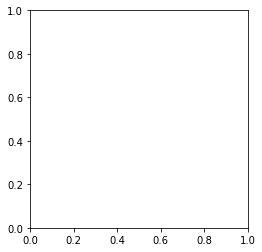

In [21]:
photo = plt.imshow('1dImages.npz')
photo.shape
photo.dtype
photo[:10:10]